Лабораторная работа №2

Выполнил: Бонокин Данил, М8О-310Б-22

1. Импортмруем библиотеки и загружаем датасеты

In [277]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import abspath, dirname

DATA_PATH = f'{dirname(abspath(__vsc_ipynb_file__))}/'
df = pd.read_csv(DATA_PATH + 'train.csv')
df_test = pd.read_csv(DATA_PATH + 'test.csv')

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


2. Приведем типы object

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Приведем колонку ApplicationDate к datetime, затем создадим 3 колонки ApplicationYear, ApplicationMonth, ApplicationDay и запишем туда значения из ApplicationDate. 

In [279]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], format = '%Y-%m-%d')
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'], format = '%Y-%m-%d')
 
df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationMonth'] = df['ApplicationDate'].dt.month
df['ApplicationDay'] = df['ApplicationDate'].dt.day

df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationDay'] = df_test['ApplicationDate'].dt.day

df = df.drop(columns = ['ApplicationDate'])
df_test = df_test.drop(columns = ['ApplicationDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10487 non-null  float64
 1   AnnualIncome                10487 non-null  float64
 2   CreditScore                 9986 non-null   float64
 3   LoanAmount                  9986 non-null   float64
 4   LoanDuration                10487 non-null  float64
 5   MaritalStatus               10487 non-null  object 
 6   NumberOfDependents          10487 non-null  float64
 7   HomeOwnershipStatus         10487 non-null  object 
 8   MonthlyDebtPayments         9986 non-null   float64
 9   CreditCardUtilizationRate   10487 non-null  float64
 10  NumberOfOpenCreditLines     10487 non-null  float64
 11  NumberOfCreditInquiries     10487 non-null  float64
 12  DebtToIncomeRatio           10487 non-null  float64
 13  BankruptcyHistory           998

Теперь применим One-Hot Encoding для MartialStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus, EducationLevel

In [280]:
columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

df = pd.get_dummies(df, columns = columns, drop_first = True)
df_test = pd.get_dummies(df_test, columns = columns, drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             10487 non-null  float64
 1   AnnualIncome                    10487 non-null  float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    10487 non-null  float64
 5   NumberOfDependents              10487 non-null  float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       10487 non-null  float64
 8   NumberOfOpenCreditLines         10487 non-null  float64
 9   NumberOfCreditInquiries         10487 non-null  float64
 10  DebtToIncomeRatio               10487 non-null  float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            

3. Удаляем все пропуски

мы можем удалить все строки с пропусками, так как их количество это небольшая доля от общего числа записей в дата-фрейме

In [281]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 11014
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9986 non-null   float64
 1   AnnualIncome                    9986 non-null   float64
 2   CreditScore                     9986 non-null   float64
 3   LoanAmount                      9986 non-null   float64
 4   LoanDuration                    9986 non-null   float64
 5   NumberOfDependents              9986 non-null   float64
 6   MonthlyDebtPayments             9986 non-null   float64
 7   CreditCardUtilizationRate       9986 non-null   float64
 8   NumberOfOpenCreditLines         9986 non-null   float64
 9   NumberOfCreditInquiries         9986 non-null   float64
 10  DebtToIncomeRatio               9986 non-null   float64
 11  BankruptcyHistory               9986 non-null   float64
 12  PreviousLoanDefaults            9986 n

4. Корреляция и тепловая карта (Heatmap)

визуально отобразим корреляции между признаками

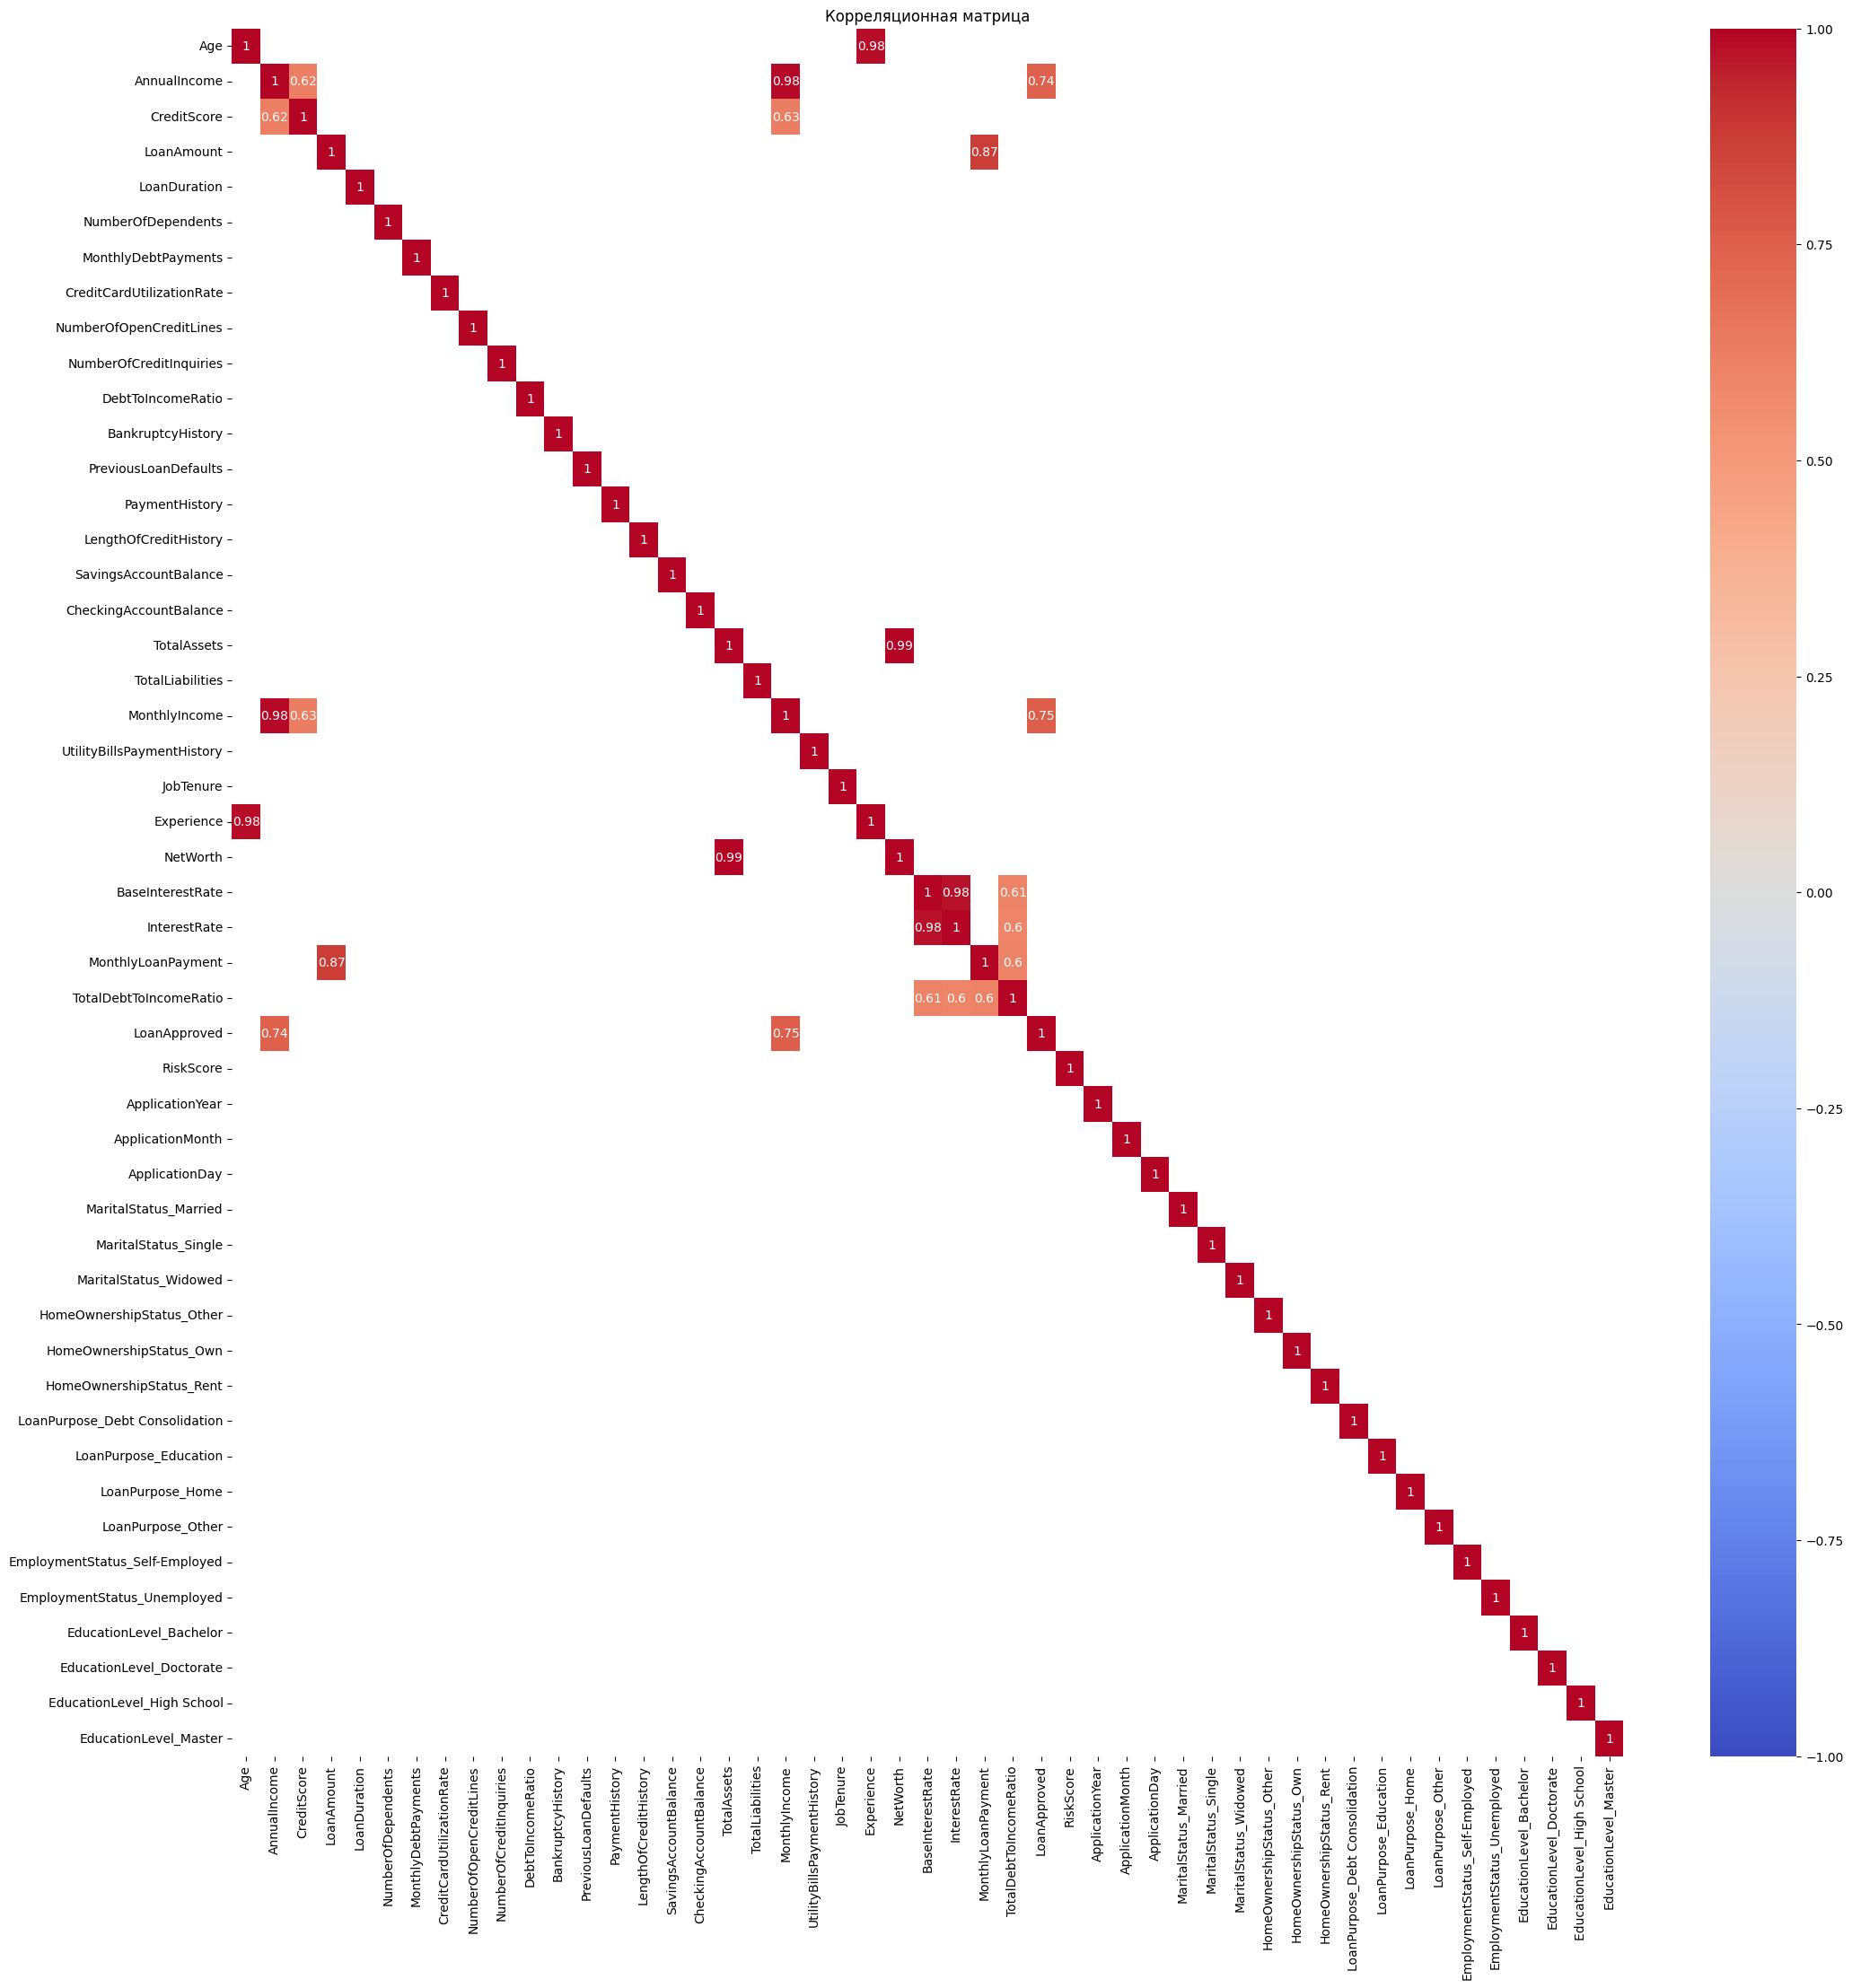

In [282]:
corr_matrix = df.corr()

plt.figure(figsize = (25, 25))
sns.heatmap(corr_matrix[corr_matrix > 0.6], annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Корреляционная матрица')
plt.show()

Рассмотрим признаки с сильной корреляцией (выше 0.7)

In [283]:
high_corr = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix != 1.)].stack()
print(high_corr)

Age                 Experience            0.982989
AnnualIncome        MonthlyIncome         0.984910
                    LoanApproved          0.742706
LoanAmount          MonthlyLoanPayment    0.872539
TotalAssets         NetWorth              0.994042
MonthlyIncome       AnnualIncome          0.984910
                    LoanApproved          0.754939
Experience          Age                   0.982989
NetWorth            TotalAssets           0.994042
BaseInterestRate    InterestRate          0.975359
InterestRate        BaseInterestRate      0.975359
MonthlyLoanPayment  LoanAmount            0.872539
LoanApproved        AnnualIncome          0.742706
                    MonthlyIncome         0.754939
dtype: float64


Удалим признаки так, чтобы исключить линейные зависимости

In [284]:

colums_ = ['Experience', 'MonthlyIncome', 'AnnualIncome', 'TotalAssets', 'BaseInterestRate', 'MonthlyLoanPayment']
df = df.drop(columns = colums_)
df_test = df_test.drop(columns = colums_)

5. Нормализуем признаки

In [285]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_min_max = MinMaxScaler()

df.info()

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 11014
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9986 non-null   float64
 1   CreditScore                     9986 non-null   float64
 2   LoanAmount                      9986 non-null   float64
 3   LoanDuration                    9986 non-null   float64
 4   NumberOfDependents              9986 non-null   float64
 5   MonthlyDebtPayments             9986 non-null   float64
 6   CreditCardUtilizationRate       9986 non-null   float64
 7   NumberOfOpenCreditLines         9986 non-null   float64
 8   NumberOfCreditInquiries         9986 non-null   float64
 9   DebtToIncomeRatio               9986 non-null   float64
 10  BankruptcyHistory               9986 non-null   float64
 11  PreviousLoanDefaults            9986 non-null   float64
 12  PaymentHistory                  9986 n

постоим графики для нормализации

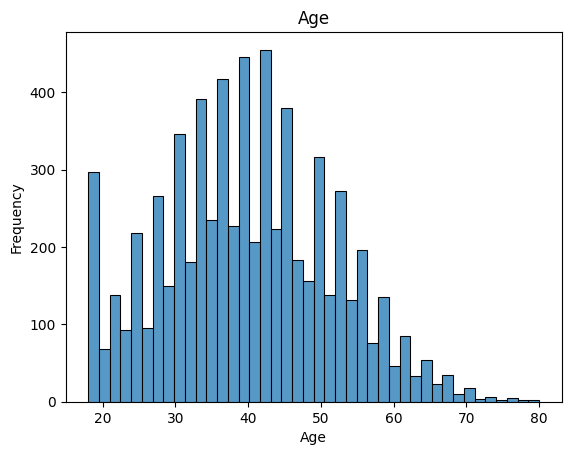

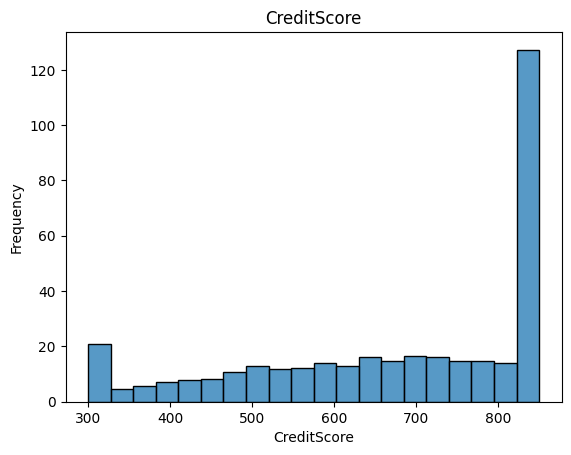

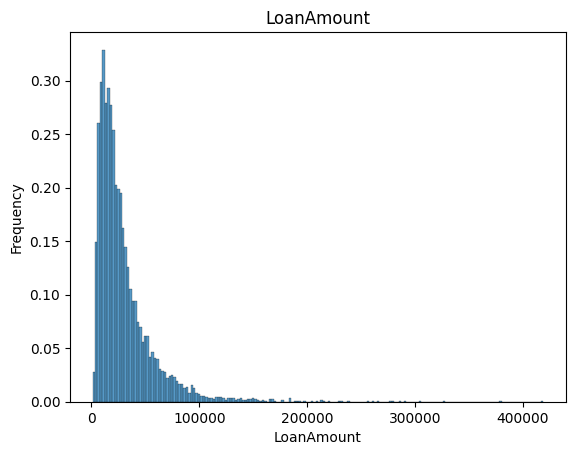

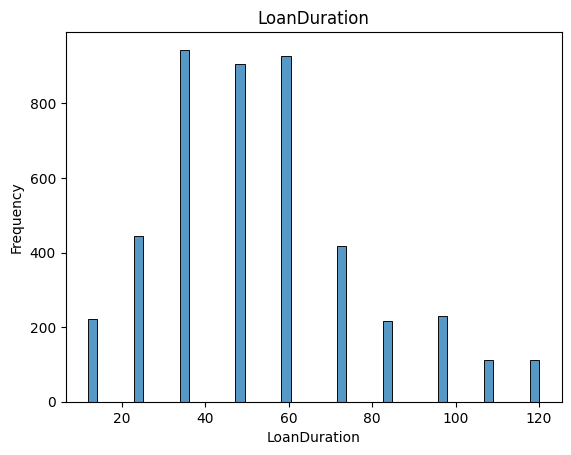

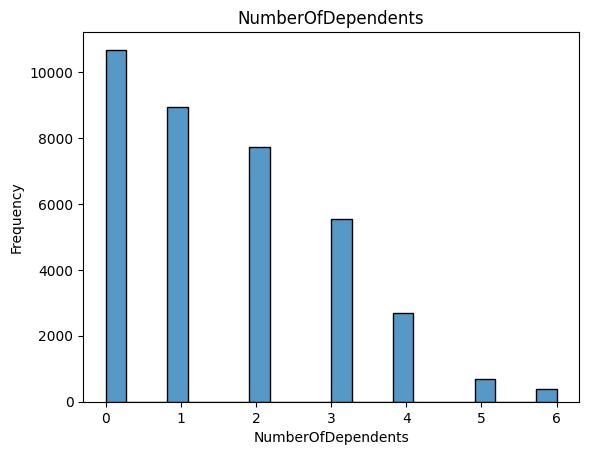

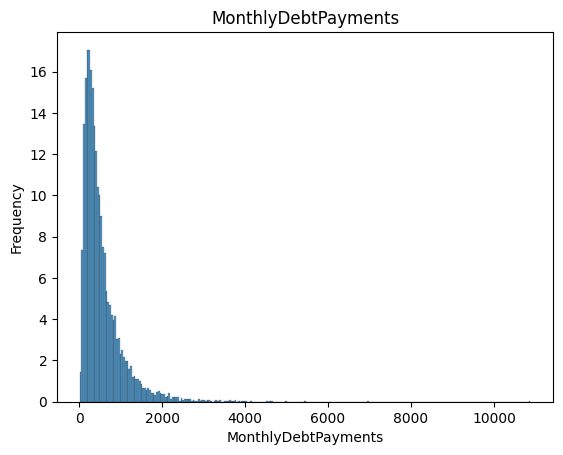

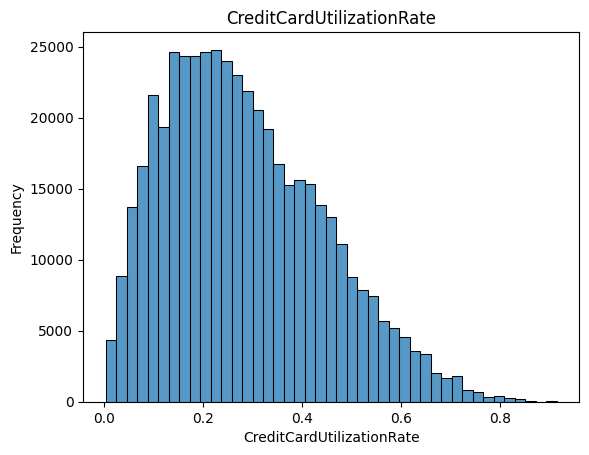

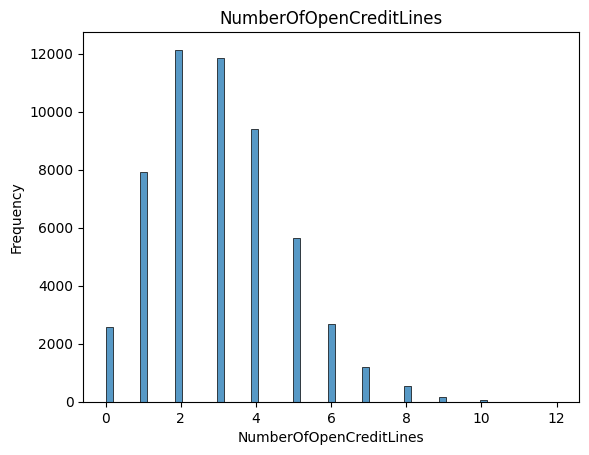

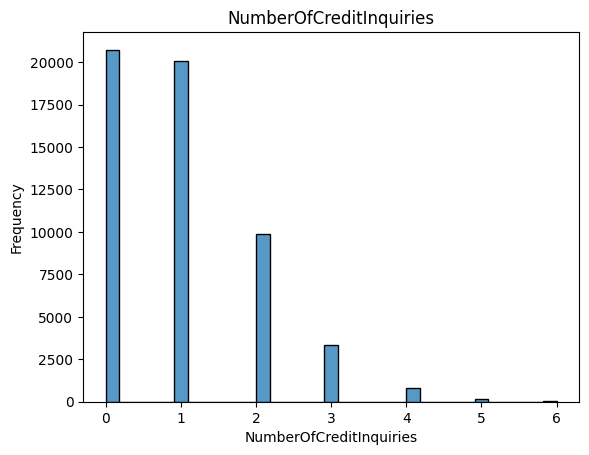

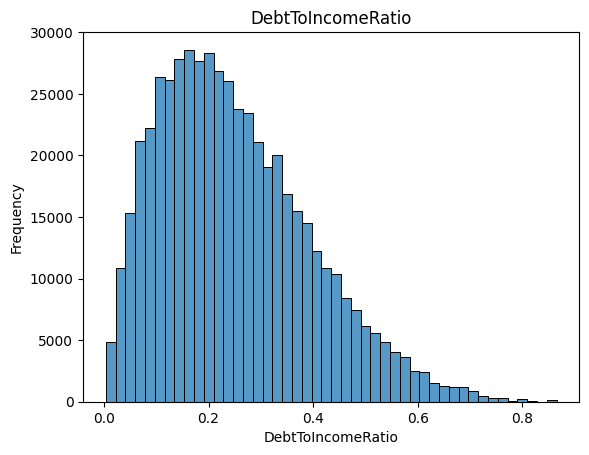

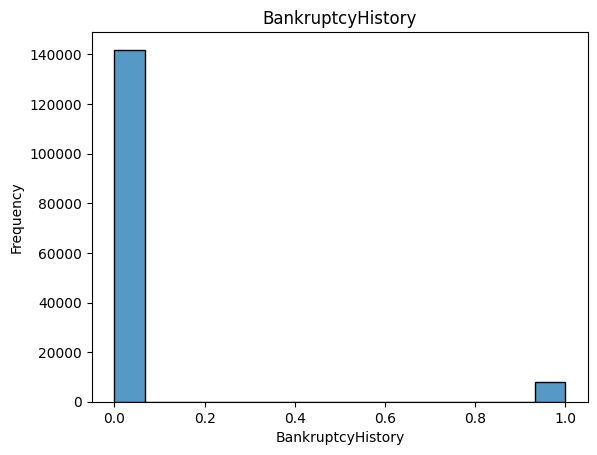

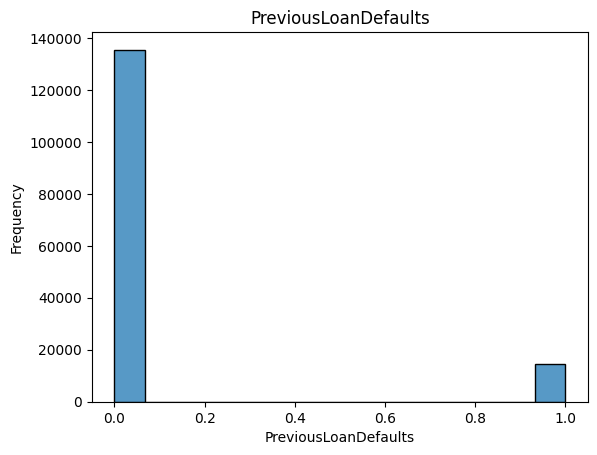

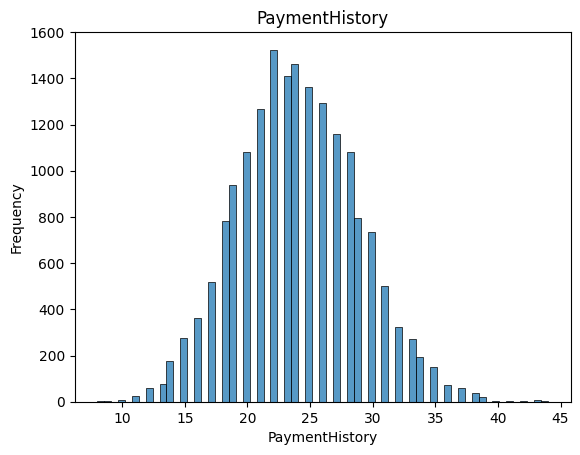

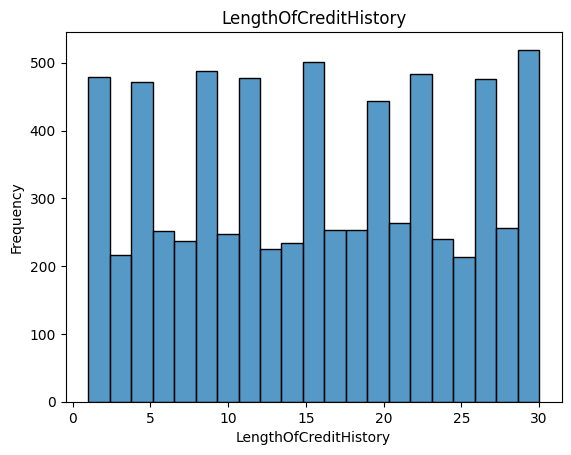

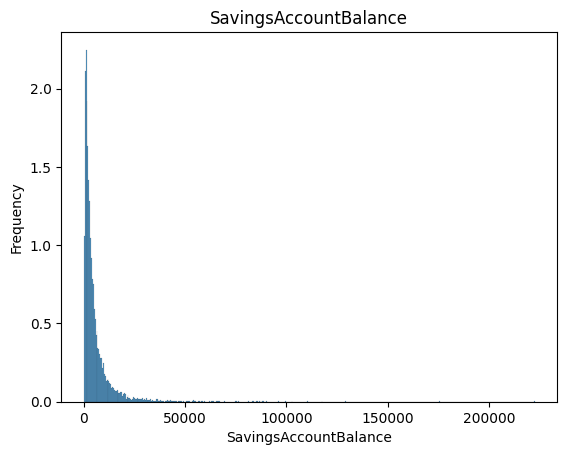

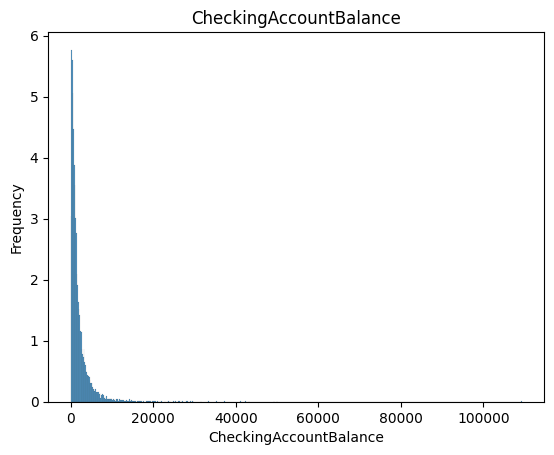

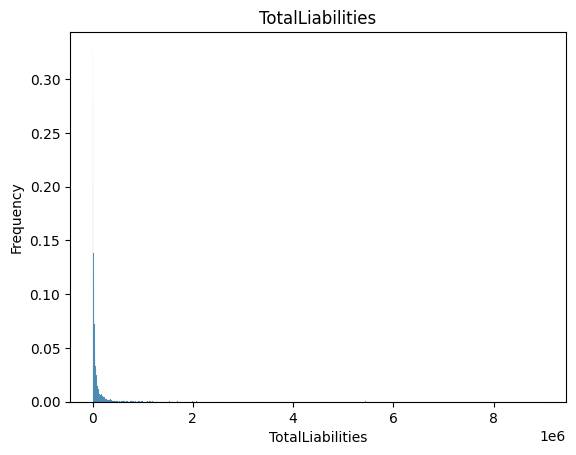

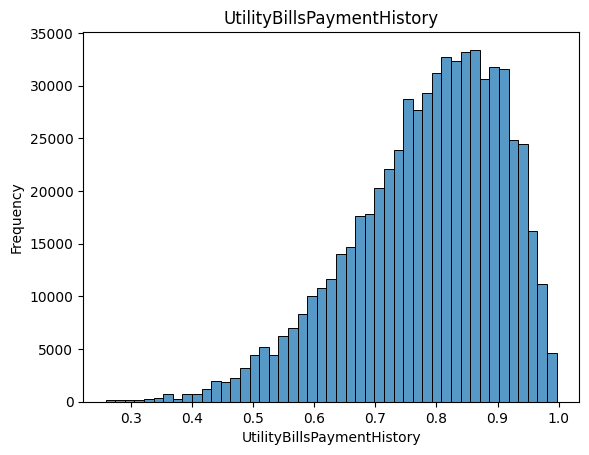

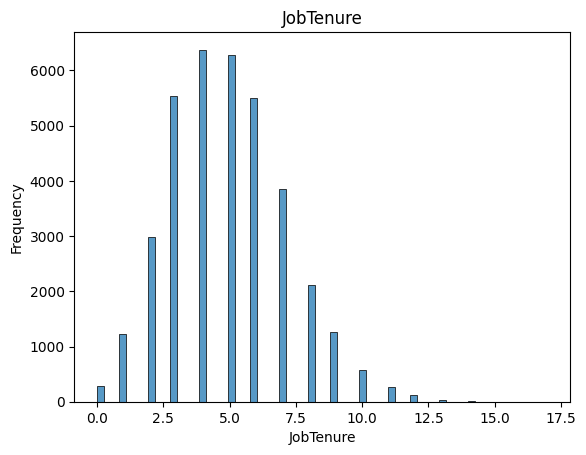

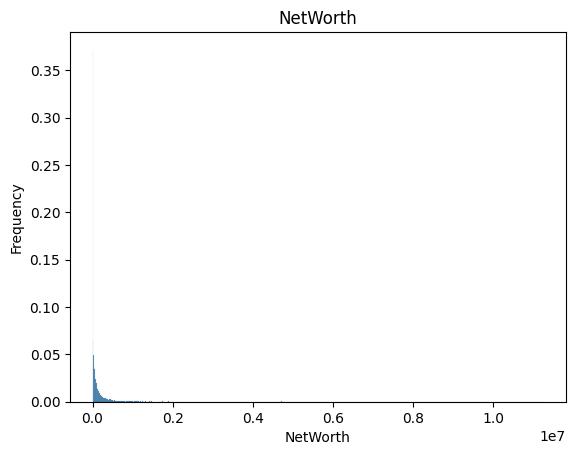

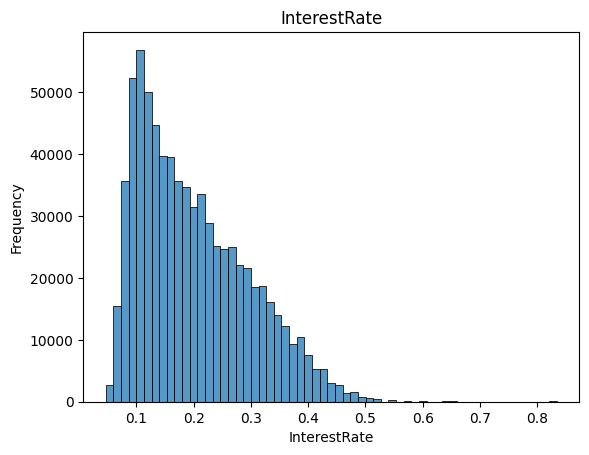

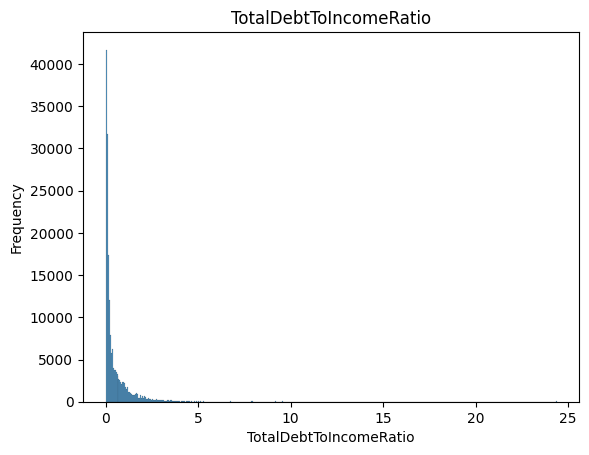

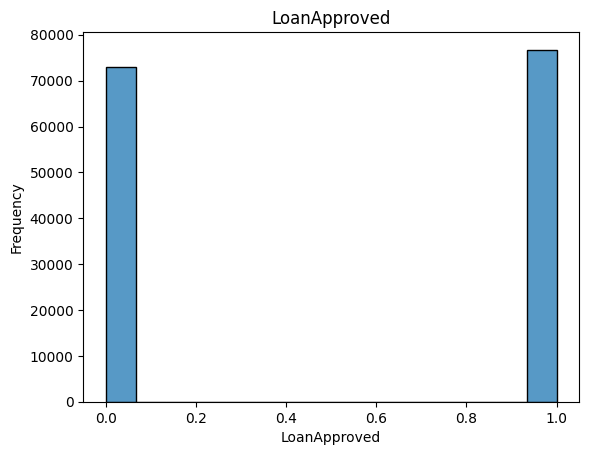

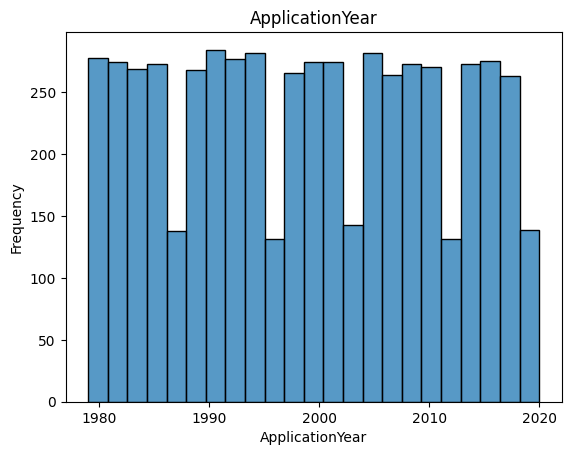

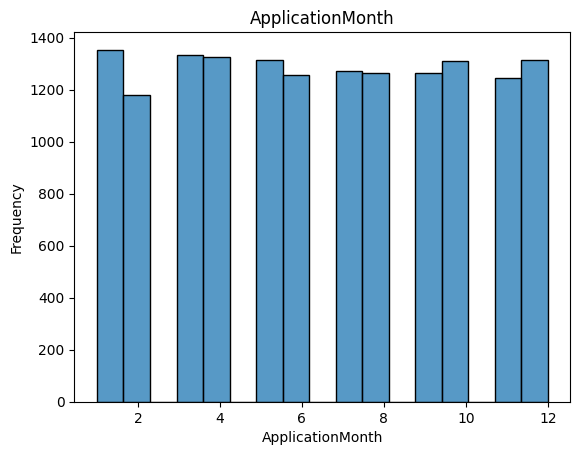

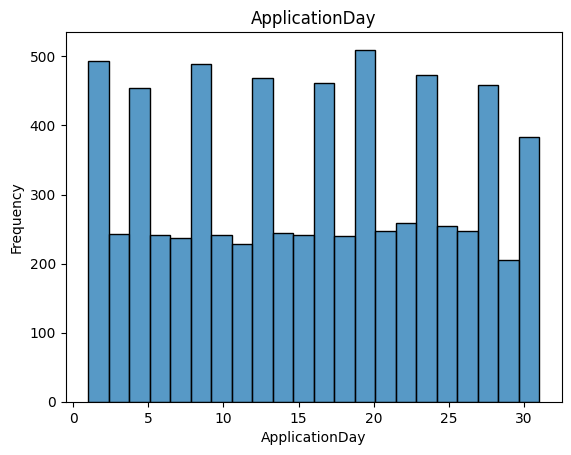

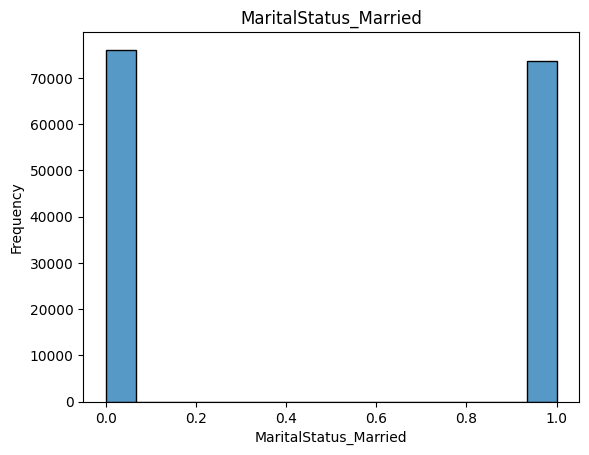

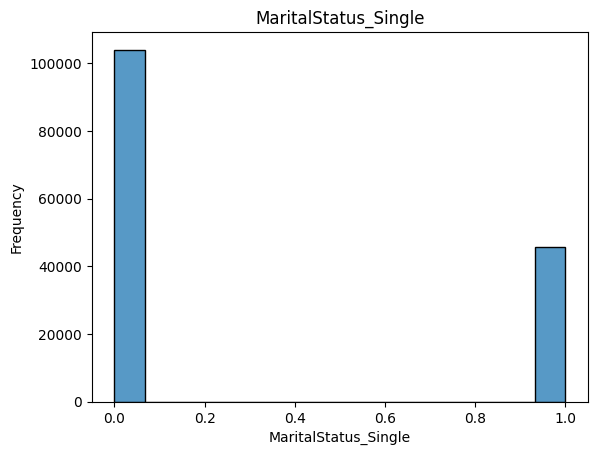

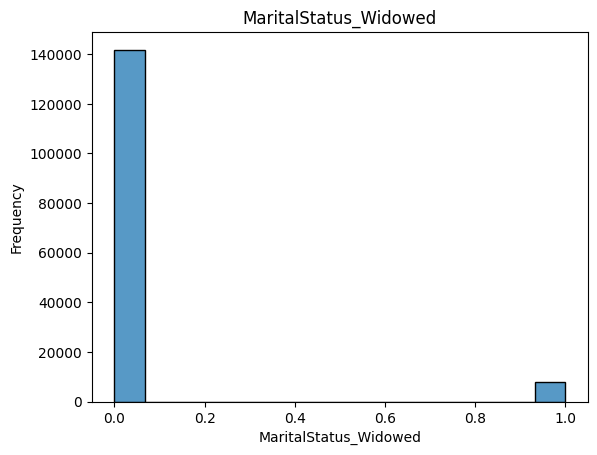

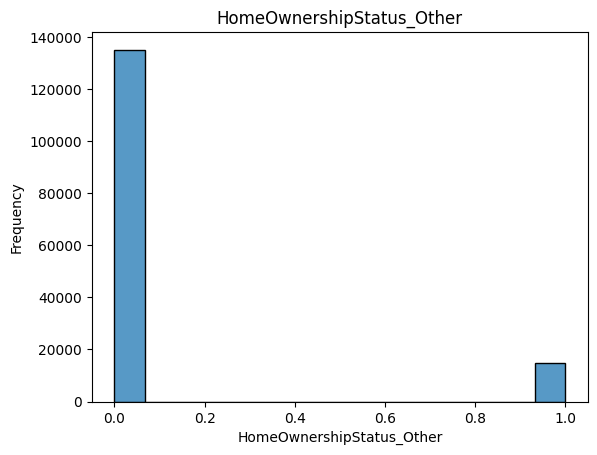

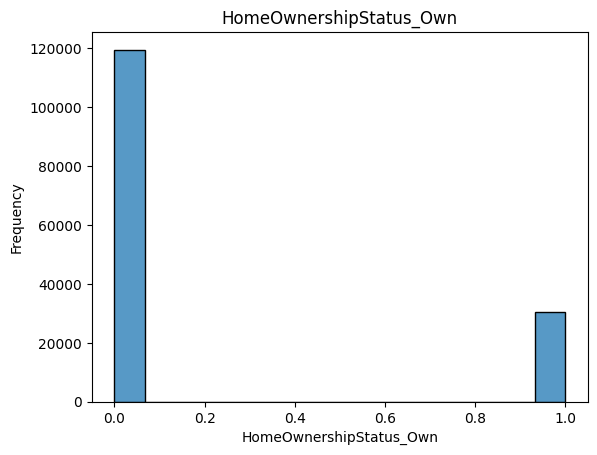

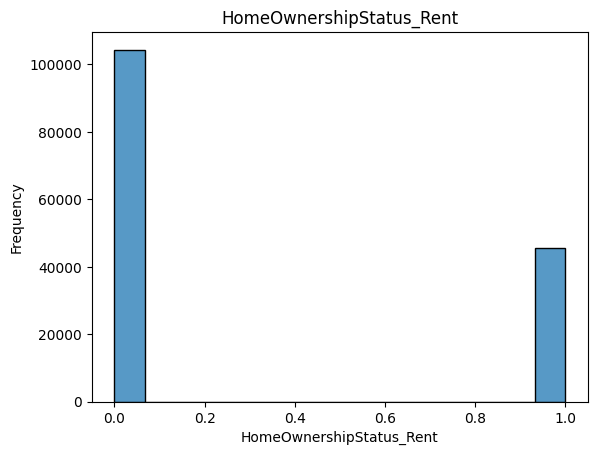

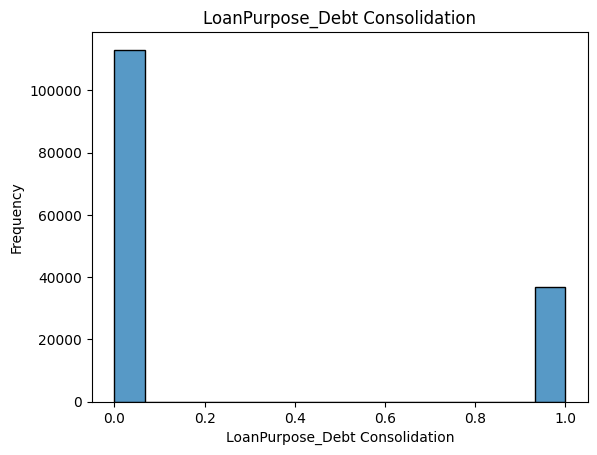

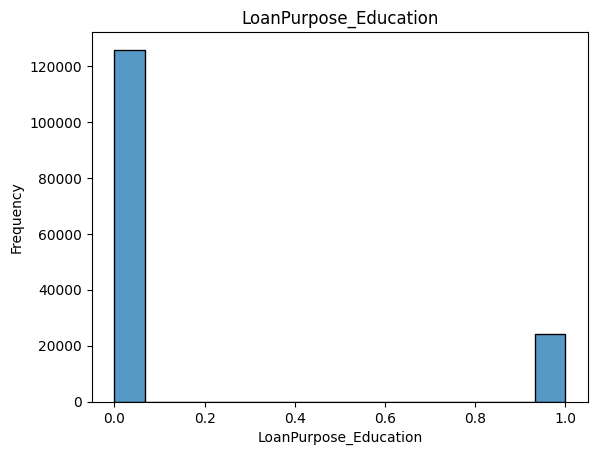

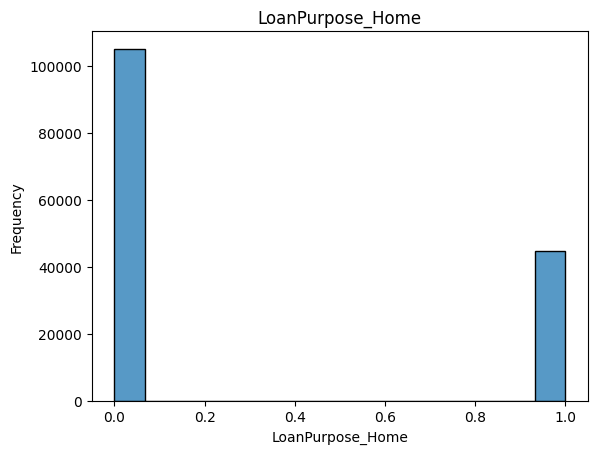

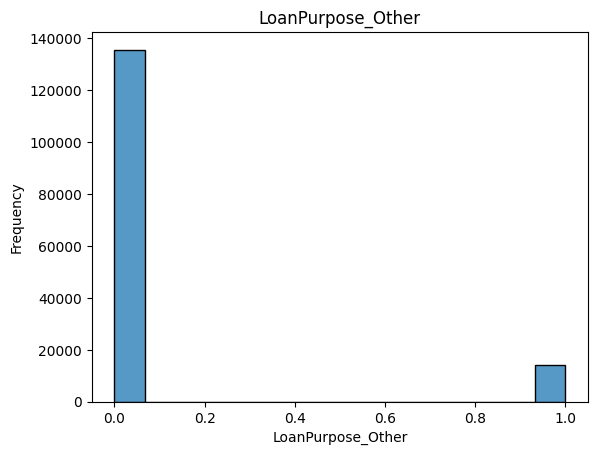

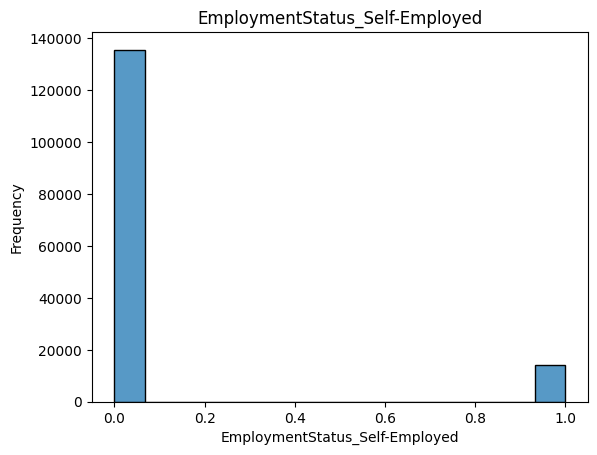

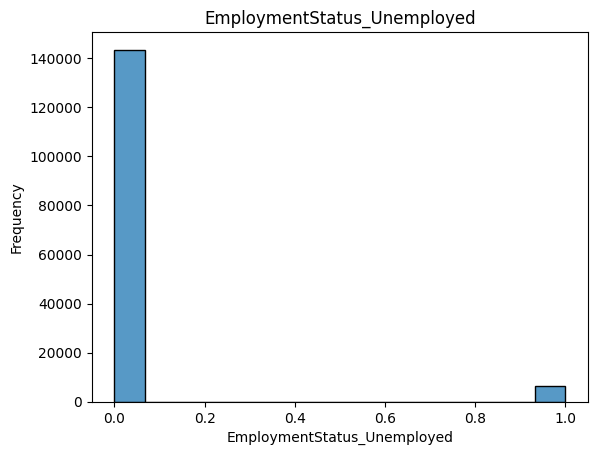

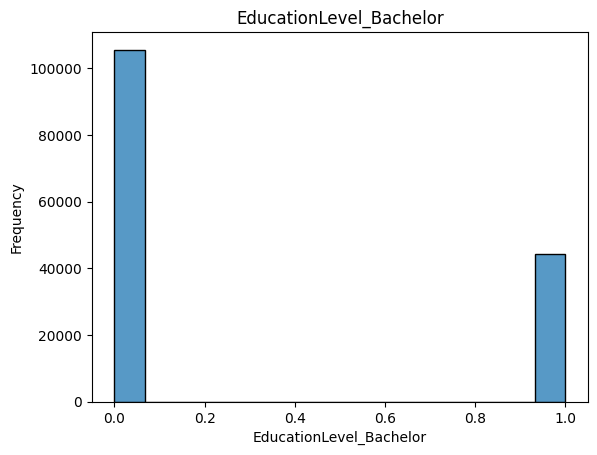

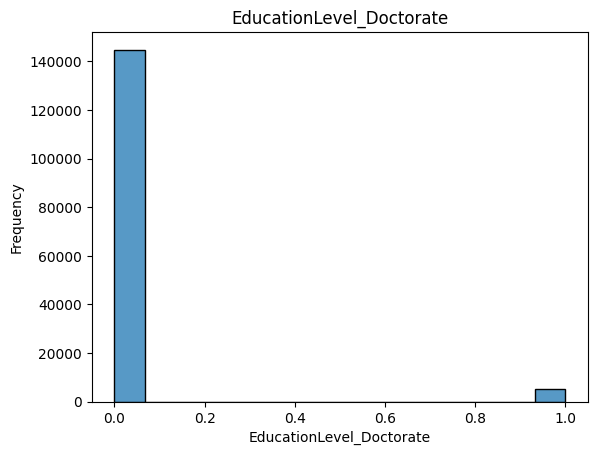

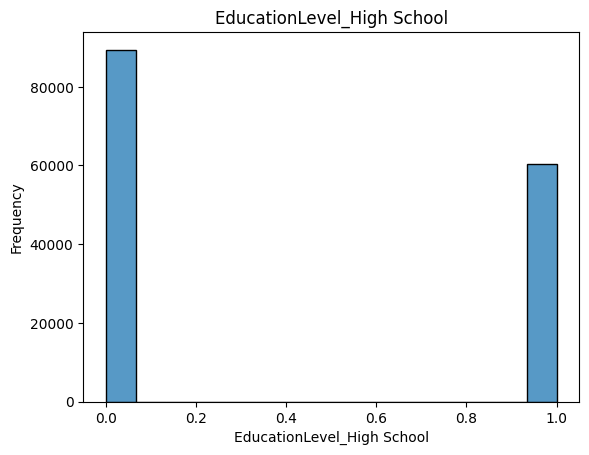

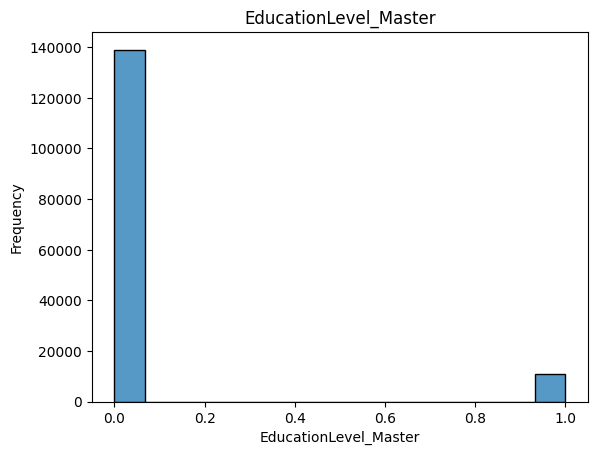

In [286]:
def show_histogram(df, column : str):
    sns.histplot(df[column], stat = 'frequency')
    plt.title(column)
    plt.show()
    
    
for name in df.columns:
    if isinstance(name, str) and name != 'RiskScore':
        show_histogram(df, name)

распределим колонки по типам распределения

In [287]:
uniform_colums = ['ApplicationYear', 'ApplicationMonth', 'ApplicationDay']
standart_colums = ['Age', 'CreditScore', 'LoanDuration', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
                'DebtToIncomeRatio', 'PaymentHistory', 'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'JobTenure']
log_colums = ['LoanAmount', 'NumberOfDependents', 'MonthlyDebtPayments',
              'NumberOfCreditInquiries', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalLiabilities',
              'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio']


теперь для колонок в uniform_colums применим min-max нормализацию, для колонок в standart_colums применим z-score нормализацию и для колонок в log_colums сначала логарифмируем их, потом применим z-score нормализацию

In [288]:
def normalize(df):
    df[standart_colums] = scaler_standard.fit_transform(df[standart_colums])
    df[uniform_colums] = scaler_min_max.fit_transform(df[uniform_colums])
    df[log_colums] = np.log1p(df[log_colums])
    df[log_colums] = scaler_standard.fit_transform(df[log_colums])
    
    return df

df = normalize(df)
df_test = normalize(df_test)

df = df[(df['RiskScore'] >= -100) & (df['RiskScore'] <= 100)]

отсечем слишком большие максимальные и минимальные значения в RiskScore

In [289]:
df = df[(df['RiskScore'] >= -100) & (df['RiskScore'] <= 100)]

6. Обучаем модель

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [291]:

model = LinearRegression()

X = df.drop(columns = ['RiskScore'])
Y = df['RiskScore']
model.fit(X, Y)

X_ = df.drop(columns = ['RiskScore'])
Y_ = df['RiskScore']

predictions = model.predict(X_)
print(f'MSE : {mean_squared_error(Y_, predictions)}')

MSE : 17.36063625568904


7. Получаем результат

In [292]:
IDS = df_test['ID']
df_test = df_test.drop(columns = ['ID'])

predictions_ = model.predict(df_test)

df_sub = pd.DataFrame({'ID': IDS, 'RiskScore': predictions_})

df_sub.to_csv('submission.csv', index = False)